Klasyfikacja z siecią neuronową

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris                # zbiór danych
from sklearn.model_selection import train_test_split  # podział na trening/test
from sklearn.preprocessing import StandardScaler      # standaryzacja danych
import tensorflow as tf
from tensorflow.keras.models import  Sequential       # budowa modelu sekwencyjnego
from tensorflow.keras.layers import Dense             # warstwy Dense
from tensorflow.keras.utils import to_categorical     # zamiana etykiet na one-hot

Przygotowanie danych

In [3]:
# Wczytanie danych
iris = load_iris()
X = iris.data                   # dane wejściowe: 4 cechy (np. długość płatka)
y = iris.target                 # etykiety klas: 0, 1, 2

# Konwersja na one hot encoding, czyli zmienne kategoryczne
y_cat = to_categorical(y)

# Podział na zbiory testowy i treningowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42
)

# Standaryzacja danych (czyli cech wejściowych) - średnia 0 i odchylenie standardowe 1 w celu lepszej nauki
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Budowa modelu sieci neuronowej

In [4]:
# Budowa modelu
model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),  # warstwa ppierwsza ukryta z 10 neuronami
    Dense(8, activation='relu'),                     # warstwa druga ukryta z 8 neuronami
    Dense(3, activation='softmax')                   # warstwa wyjściowa z 3 neuronami (dlatego softmax)
])

# Kompilacja modelu
model.compile(
    optimizer='adam',                               #niby szybki i dobry do uczenia
    loss='categorical_crossentropy',                #rodzaj straty - loss
    metrics=['accuracy']                            #metryki dokładności
)

# Trenowanie modelu
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,                         #100 iteracji - przejśc po danych
    batch_size=8,                       #8 próbek jednocześnie
    validation_split=0.1,               # 10% danych treningowych do walidacji
    verbose=1
)


Epoch 1/100


c:\Python\Kodilla\MACHINE_LEARNING\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2873 - loss: 1.4498 - val_accuracy: 0.0833 - val_loss: 1.4578
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2514 - loss: 1.3231 - val_accuracy: 0.0833 - val_loss: 1.3719
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2367 - loss: 1.2975 - val_accuracy: 0.0833 - val_loss: 1.2987
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2542 - loss: 1.2073 - val_accuracy: 0.0833 - val_loss: 1.2327
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2515 - loss: 1.1441 - val_accuracy: 0.2500 - val_loss: 1.1796
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2857 - loss: 1.1132 - val_accuracy: 0.3333 - val_loss: 1.1279
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4896 - loss: 0.9653 - val_accuracy: 0.4167 - val_loss: 1.0786
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5705 - loss: 0.8686 - val_accuracy: 0.5000 - val_loss: 1.

Ocena i predykcja

In [5]:

# Ocena modelu na zbiorze testowym
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nDokładność na zbiorze testowym: {accuracy:.2f}")

# Predykcja na danych testowych
y_pred_proba = model.predict(X_test_scaled)  # prawdopodobieństwa
y_pred_class = np.argmax(y_pred_proba, axis=1)  # wybieramy największe
y_true_class = np.argmax(y_test, axis=1)        # oryginalne etykiety

print("\nPredykcje klas:", y_pred_class)
print("Rzeczywiste klasy:", y_true_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0939

Dokładność na zbiorze testowym: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Predykcje klas: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Rzeczywiste klasy: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Wizualizacja

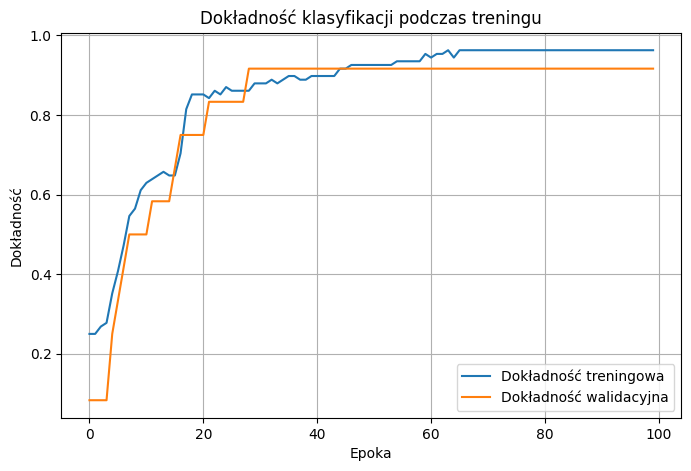

In [6]:
# Wykres dokładności trening/validacja
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.title('Dokładność klasyfikacji podczas treningu')
plt.legend()
plt.grid(True)
plt.show()